In [1]:
import pandas as pd
import numpy as np
import os
import re
import glob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%time
# Load data #
data=pd.read_csv("datafiles/common_input/merged.csv")

#  Print columns of dataset with missing values #
list = data.columns[data.isna().any()].tolist()
print(list)

# Fill NA values with mean of the corresponding column #
for i in list:
    print(i)
    print(data.isna().sum())                      
    data[i].fillna(data[i].mean(), inplace=True)  

[]
CPU times: user 2min 45s, sys: 2.83 s, total: 2min 48s
Wall time: 2min 48s


In [3]:
# Extract all the top features prioritized by the three MLP architectures (MLP1H, MLP2H, MLP3H) in all rounds of their training #
cols=np.loadtxt("datafiles/Workflow2/output/MLPallnonred-kd-featurelist.csv", dtype=str, delimiter=",")

# Set feature and target columns #
features = data.filter(cols)
target = data['labels']
print(features.head(n=5))
print(target.head(n=5))

# Train test split #
misel = SelectKBest(mutual_info_classif, k="all")

    191-238  162-208  191-233  105-183  128-192  157-236    70-91  191-260  \
0  11.97870  14.5808  8.51649  21.7411  24.3121  17.6273  19.1549  19.7087   
1  10.01410  14.2115  9.49887  21.6799  23.8066  16.2516  19.0263  20.1875   
2  10.73540  14.5949  9.15612  23.3764  24.4845  15.4941  19.0869  19.8669   
3  11.47800  14.2701  9.38102  22.1840  24.8525  16.2799  18.9013  19.2377   
4   9.11293  14.4493  8.82939  22.0445  24.2904  16.2966  19.9366  19.8839   

   131-206   254-287  ...   50-191   96-191  186-202   38-206  189-258  \
0  26.9916  11.31770  ...  19.5976  33.5628  16.5983  37.0451  29.1550   
1  27.8652  11.47280  ...  19.8424  32.8300  16.6825  37.4270  29.9501   
2  26.6545  10.60260  ...  18.7315  31.6923  16.5440  33.6245  29.3638   
3  27.1760  10.81430  ...  18.3538  31.8702  16.1160  35.6819  29.1837   
4  27.0934   9.95397  ...  20.2261  33.6891  18.2857  36.8089  29.1130   

   186-216  189-198  147-184   30-191   41-206  
0  16.8953  16.3082  26.4461  37.8259

In [4]:
def miscore(X,y,seed):
    misel.fit(X, y)
    scores = misel.scores_
    mi_scores=pd.Series(scores, name="MI Scores", index=X.columns)
    mi_scores=mi_scores.sort_values(ascending=False)
    mi_scores.to_csv("miscores-MLPderivedfeatures-seed"+str(seed)+".csv",sep=",")
    return mi_scores

In [5]:
def plot_mi_scores(seed, scores):
    scores = scores[:30].sort_values(ascending=False)
    width = np.arange(len(scores))
    ticks = scores[:30].index
    plt.bar(width, scores, color="mediumturquoise")
    plt.xticks(width, ticks, rotation='vertical')
    plt.title("Mutual Information Scores")
    plt.savefig("MI-MLPderivedfeatures-seed"+str(seed)+".png", dpi=300)

/home/nibedita/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


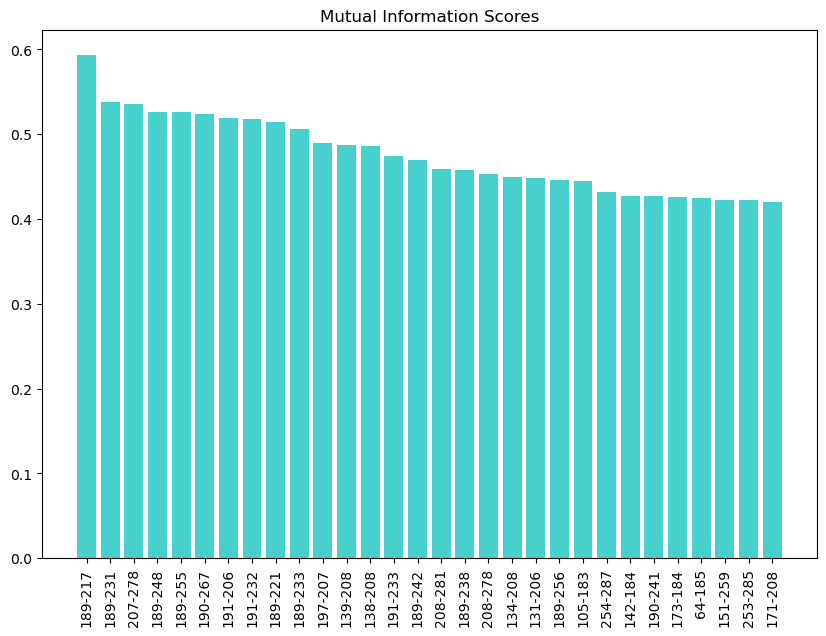

In [6]:
# Do one round of MI classification and rescore the MLP prioritized features #
mi_scores=miscore(features,target,12) # random_state arbitrarily assigned 12 in the project
plt.figure(dpi=100, figsize=(10, 7))
plot_mi_scores(12, mi_scores)